## Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import datasets

## Create Some Classification Data

In [3]:
Xs_c, y_c = datasets.make_classification(n_features=8,n_samples=1000,n_classes=3,n_informative=5)
features_c = pd.DataFrame(Xs_c)
data_c = pd.concat([features_c,pd.DataFrame(y_c)],axis=1)
data_c.columns = ['A','B','C','D','E','F','G','H','Target']
X_train, X_test, y_train, y_test = train_test_split(features_c, y_c, test_size=0.25)

## Classification: Investigate Features

<Figure size 576x576 with 0 Axes>

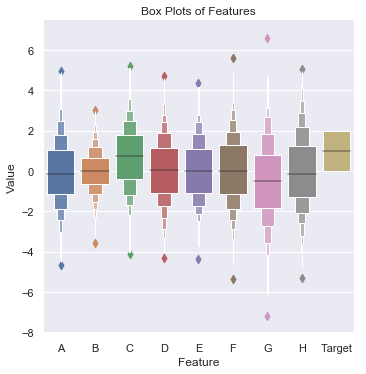

In [4]:
plt.figure(figsize=(8,8))
sns.catplot(data=data_c,kind='boxen').set(xlabel='Feature',ylabel='Value',title='Box Plots of Features')

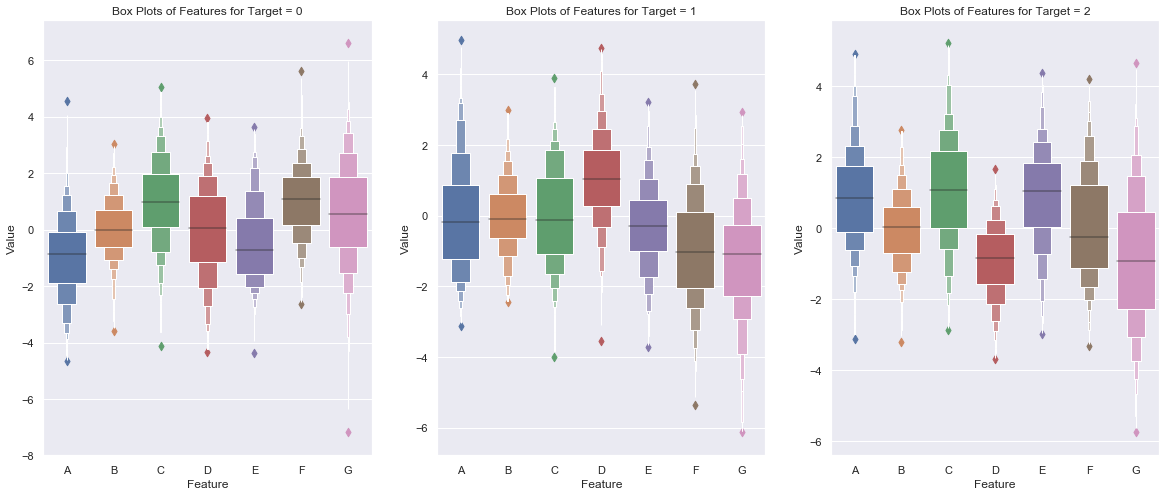

In [5]:
fig, axs = plt.subplots(figsize=(20,8),ncols=3)
for i in range(3):
    sns.boxenplot(data=data_c[data_c['Target']==i].iloc[:,:7],ax=axs[i]).set(
        xlabel='Feature',ylabel='Value',title='Box Plots of Features for Target = '+str(i))

/Users/jacobswe/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, ou

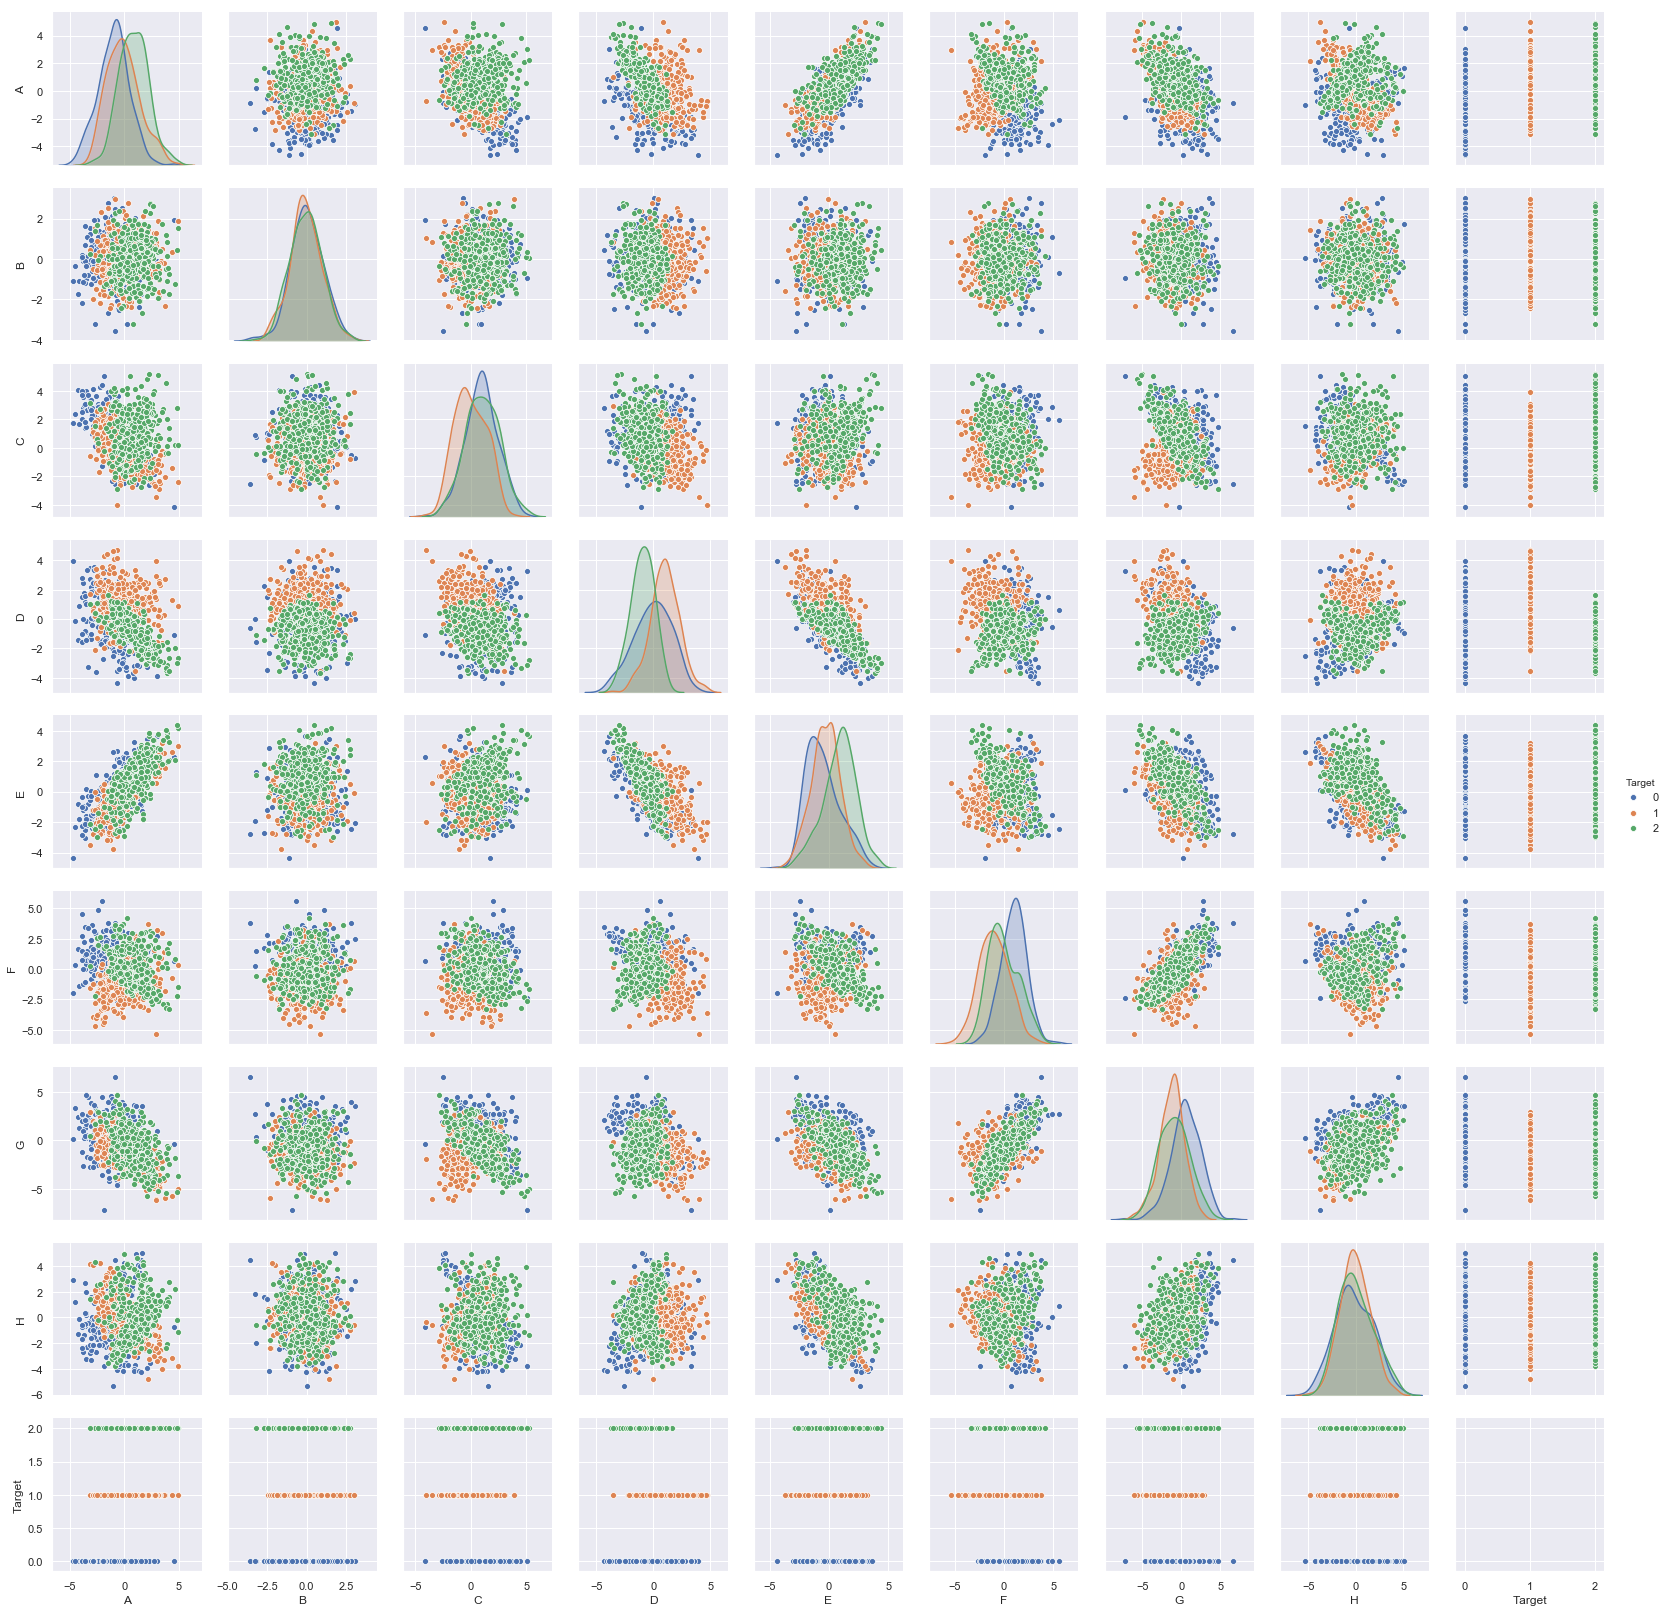

In [6]:
sns.pairplot(data_c,hue='Target')

## Consider Some Models

In [10]:
#Linear Support Vector Machine
lsvr = LinearSVC()
grid = {'C':[0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]}
gscv = GridSearchCV(lsvr,grid,cv=3,verbose=True,return_train_score=False)
gscv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=True)

In [11]:
scores = pd.DataFrame(gscv.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
print(scores)

  param_C  mean_test_score
0       2         0.692000
1     0.2         0.690667
2     0.4         0.690667
3     0.6         0.690667
4     0.8         0.690667
5       1         0.690667
6     1.2         0.690667
7     1.4         0.690667
8     1.6         0.690667
9     1.8         0.690667


Which one of these is the best? Why? Is this the best possible?

In [1]:
#Let's create a RandomForestClassifier together

## Create Some Regression Data

In [24]:
Xs_r, y_r = datasets.make_regression(n_features=5,n_samples=1000,noise=1.4)
features_r = pd.DataFrame(Xs_r)
data_r = pd.concat([features_r,pd.DataFrame(y_r)],axis=1)
data_r.columns = ['A','B','C','D','E','Target']
X_train, X_test, y_train, y_test = train_test_split(features_r, y_r, test_size=0.25)

## Evaluate the Features

/Users/jacobswe/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


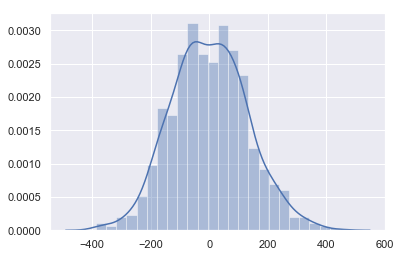

In [25]:
sns.distplot(np.ravel(y_r))

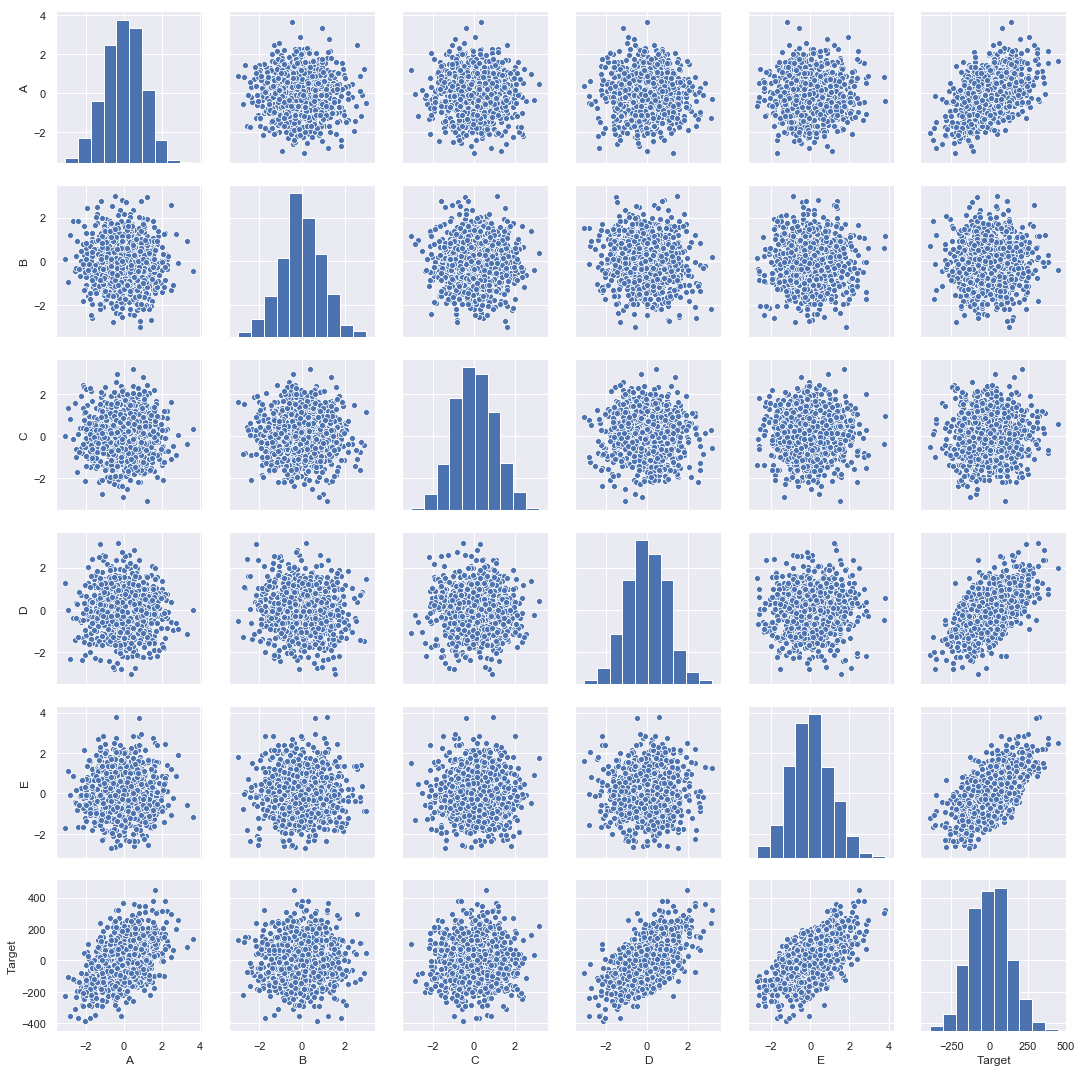

In [26]:
sns.pairplot(data_r)

## Consider Some Models

In [27]:
lsvr = LinearSVR()
grid = {'C':[0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2],
       'epsilon':[0,0.1],
       'loss':['epsilon_insensitive','squared_epsilon_insensitive']}
gscv = GridSearchCV(lsvr,grid,cv=3,verbose=True,return_train_score=False,scoring='r2')
gscv.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2], 'epsilon': [0, 0.1], 'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='r2', verbose=True)

In [28]:
scores = pd.DataFrame(gscv.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
print(scores)

   param_C param_epsilon                   param_loss  mean_test_score
0        2           0.1  squared_epsilon_insensitive         0.999894
1        2             0  squared_epsilon_insensitive         0.999894
2      1.8             0  squared_epsilon_insensitive         0.999894
3      1.8           0.1  squared_epsilon_insensitive         0.999894
4      1.6             0  squared_epsilon_insensitive         0.999894
5      1.6           0.1  squared_epsilon_insensitive         0.999894
6      1.4             0  squared_epsilon_insensitive         0.999894
7      1.4           0.1  squared_epsilon_insensitive         0.999894
8      1.2             0  squared_epsilon_insensitive         0.999894
9      1.2           0.1  squared_epsilon_insensitive         0.999894
10       1             0  squared_epsilon_insensitive         0.999894
11       1           0.1  squared_epsilon_insensitive         0.999894
12     0.8             0  squared_epsilon_insensitive         0.999893
13    

In [29]:
#Let's create a Ridge Regression Model
from sklearn.linear_model import Ridge

In [30]:
model = Ridge()

In [31]:
grid = {'alpha':[0,0.1,1,10,100],
        'solver':['lsqr','sag']}

In [32]:
gscv = GridSearchCV(model,grid,cv=5,verbose=True,return_train_score=False,scoring='r2')

In [33]:
gscv.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0, 0.1, 1, 10, 100], 'solver': ['lsqr', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='r2', verbose=True)

In [34]:
scores = pd.DataFrame(gscv.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
print(scores)

  param_alpha param_solver  mean_test_score
0           0         lsqr         0.999894
1         0.1         lsqr         0.999894
2           1          sag         0.999893
3         0.1          sag         0.999892
4           0          sag         0.999892
5           1         lsqr         0.999891
6          10         lsqr         0.999658
7          10          sag         0.999654
8         100          sag         0.981802
9         100         lsqr         0.981777
